In [1]:
# ONLY the following libraries are allowed:
# matplotlib and numpy (imported by %pylab), pandas, scipy, and statsmodels.api.
################################################################################################################################
#  libraries allowed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# CELL1
health = pd.read_csv('./2017Health.txt', sep='\t', index_col='State')

meantbr = health['Teen Birth Rate'].mean()
meanvcr = health['Violent Crime Rate'].mean()
meanps = health['Percentage Smokers'].mean()

mintbr = health['Teen Birth Rate'].min()
minvcr = health['Violent Crime Rate'].min()
minps = health['Percentage Smokers'].min()

maxtbr = health['Teen Birth Rate'].max()
maxvcr = health['Violent Crime Rate'].max()
maxps = health['Percentage Smokers'].max()

errtbr = 1.96 * health['Teen Birth Rate'].std() / sqrt(len(health['Teen Birth Rate']))
errvcr = 1.96 * health['Violent Crime Rate'].std() / sqrt(len(health['Violent Crime Rate']))
errps = 1.96 * health['Percentage Smokers'].std() / sqrt(len(health['Percentage Smokers']))

citbr = [(round(meantbr - errtbr, 2)), (round(meantbr + errtbr, 2))]
civcr = [(round(meanvcr - errvcr, 2)), (round(meanvcr + errvcr, 2))]
cips = [(round(meanps - errps, 2)), (round(meanps + errps, 2))]

column_names = ['Mean', 'Minimum', 'Maximum', '95% Confidence Interval (CI)']
row_names = ['Teen Birth Rate', 'Violent Crime Rate', 'Percentage Smokers']
df = pd.DataFrame(index=row_names, columns=column_names)

dfmean = {'Teen Birth Rate' : round(meantbr, 2), 'Violent Crime Rate' : round(meanvcr, 2), 'Percentage Smokers' : round(meanps, 2)}
dfmin = {'Teen Birth Rate' : round(mintbr, 2), 'Violent Crime Rate' : round(minvcr, 2), 'Percentage Smokers' : round(minps, 2)}
dfmax = {'Teen Birth Rate' : round(maxtbr, 2), 'Violent Crime Rate' : round(maxvcr, 2), 'Percentage Smokers' : round(maxps, 2)}
dfci = {'Teen Birth Rate' : citbr, 'Violent Crime Rate' : civcr, 'Percentage Smokers' : cips}

df['Mean'] = dfmean
df['Minimum'] = dfmin
df['Maximum'] = dfmax
df['95% Confidence Interval (CI)'] = dfci

df

,Mean,Minimum,Maximum,95% Confidence Interval (CI)
Teen Birth Rate,41.50,15,77,"[37.96, 45.04]"
Violent Crime Rate,409.59,127,809,"[369.19, 449.99]"
Percentage Smokers,16.92,11,21,"[16.35, 17.5]"


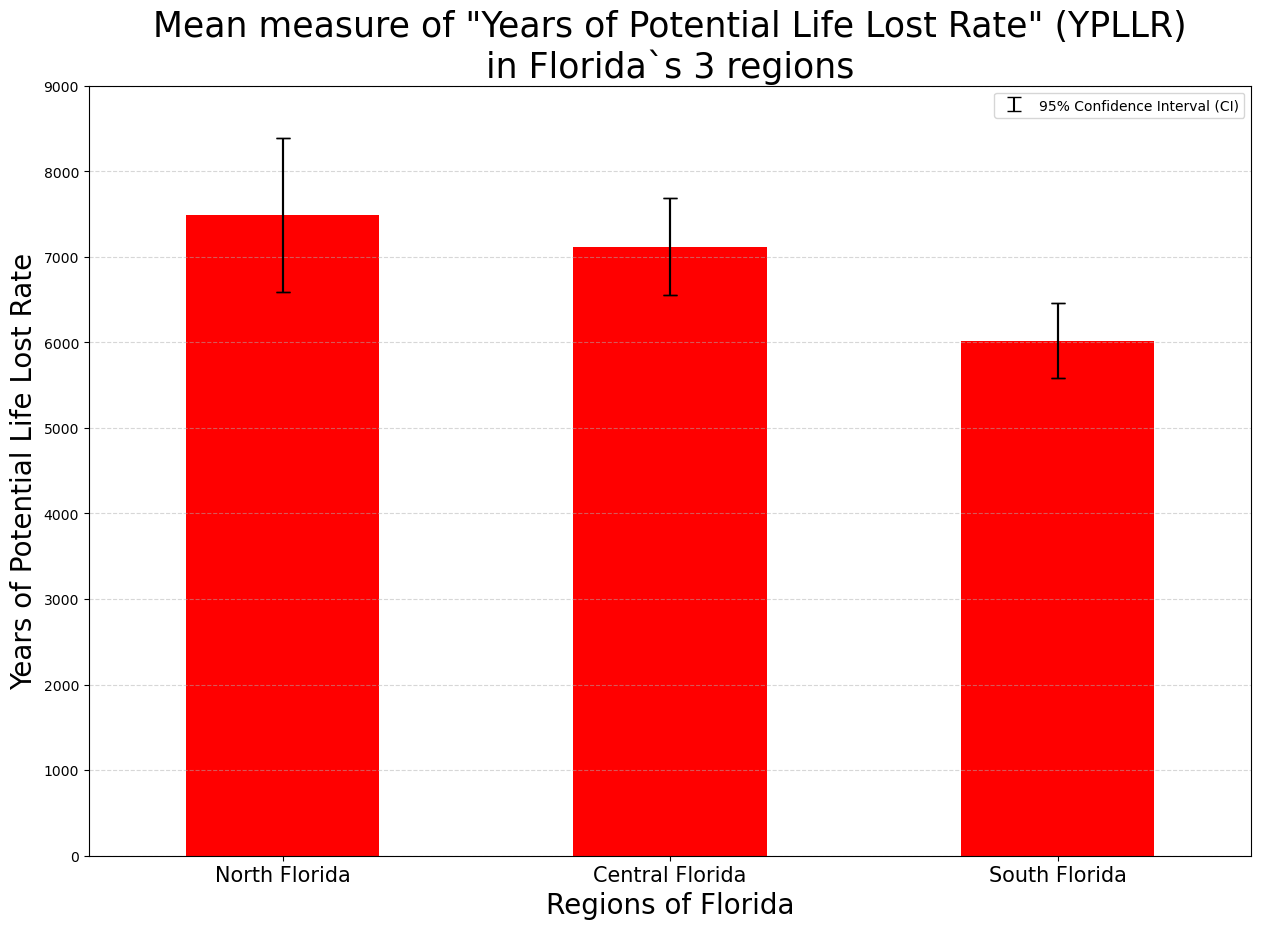

In [3]:
# CELL2
northflorida = ['Duval', 'Alachua', 'Leon', 'Flagler', 'Marion']
centralflorida = ['Orange', 'Polk', 'Hillsborough', 'Pinellas', 'Brevard']
southflorida = ['Miami-Dade', 'Broward', 'Lee', 'Palm Beach', 'Sarasota']

nfdata = health[health['County'].isin(northflorida)]
cfdata = health[health['County'].isin(centralflorida)]
sfdata = health[health['County'].isin(southflorida)]

def calculate_err(data):
    years = data['Years of Potential Life Lost Rate']
    #meany = round(mean(years), 2)
    err = 1.96 * std(years) / sqrt(len(years))
    return mean(years), err

northmean, northerr = calculate_err(nfdata)
centralmean, centralerr = calculate_err(cfdata)
southmean, southerr = calculate_err(sfdata)

northci = [round(northmean-northerr, 2), round(northmean+northerr, 2)]
centralci = [round(centralmean-centralerr, 2), round(centralmean+centralerr, 2)]
southci = [round(southmean-southerr, 2), round(southmean+southerr, 2)]

figure(figsize(15,10))
N = 3
ind = arange(N)  # the x locations for the data groups
width = 0.5

plt.bar(ind, [northmean, centralmean, southmean], width, color='r', yerr=[northerr, centralerr, southerr], capsize=5)
plt.errorbar(ind, [northmean, centralmean, southmean], yerr=[northerr, centralerr, southerr], fmt='none', label='95% Confidence Interval (CI)', capsize=5, color='black')
plt.legend()

ylabel('Years of Potential Life Lost Rate', fontsize=20)
xlabel('Regions of Florida', fontsize=20)

xtickloc = ind
xticklabels = ['North Florida', 'Central Florida', 'South Florida']
xticks(xtickloc, xticklabels, rotation='horizontal', fontsize=15)

title('Mean measure of "Years of Potential Life Lost Rate" (YPLLR)\nin Florida`s 3 regions', fontsize=25)

xlim([-0.5,2.5])
ylim([0, 9000])

plt.grid(axis='y', linestyle='--', alpha=0.5)

savefig('Q1.Part1.2.png')
show()


# indicate meaning of error bars in legend (error bars indicate the 95% CI)
#################### for me
#def intervals_overlap(interval1, interval2):
#    start1, end1 = interval1
#    start2, end2 = interval2
#
#    # Check for overlap
#    if end1 >= start2 and start1 <= end2:
#        return True
#   else:
#        return False
    
#if intervals_overlap(centralci, southci):
#    print("Intervals overlap!")
#else:
#    print("Intervals do not overlap.")


In [4]:
# CELL3
#clearly state the tests used
#print('North Florida sample mean =', round(northmean, 2))
#print('Central Florida sample mean =', round(centralmean, 2))
#print('South Florida sample mean =', round(southmean, 2))
#print('\n')
#print('North Florida CI', northci)
#print('Central Florida CI', centralci)
#print('South Florida CI', southci)
#print('\n')

#print('difference of means =', round(abs(northmean - centralmean), 2))
#print('Intervals overlap')

#ntestnorth_statistic, ntestnorth_pvalue = stats.shapiro(nfdata['Years of Potential Life Lost Rate'])
#print('North Florida normality test: pvalue =', ntestnorth_pvalue)
#ntestcentral_statistic, ntestcentral_pvalue = stats.shapiro(cfdata['Years of Potential Life Lost Rate'])
#print('Central Florida normality test: pvalue =', ntestcentral_pvalue)
#print('North Florida normality p-value =', round(ntestnorth_pvalue, 2), '>=', 0.05, '=> normal (use ttest)')
#print('Central Florida normality p-value =', round(ntestcentral_pvalue, 2), '>=', 0.05, '=> normal (use ttest)')


#ttest_statistic, ttest_pvalue = stats.ttest_ind(nfdata['Years of Potential Life Lost Rate'], cfdata['Years of Potential Life Lost Rate'])
#print('p-value of t-test =', ttest_pvalue)
#print('t-test p-value =', round(ttest_pvalue, 2), '>=', 0.05, '=> no statistically significant difference between North Florida and Central Florida\n')

print('North Florida versus Central Florida:\n'
      'The mean "Years of Potential Life Lost Rate" differs between North Florida (' + str(round(northmean, 2)) + ') and Central Florida (' + str(round(centralmean, 2)) + '), and evaluating the statistical significance of this disparity\n'
      'requires considering the 95% Confidence Intervals (CIs), which is ' 
      + str(northci) + ' for North Florida and ' + str(centralci) + ' for Central Florida.\n'
      'As the two CIs overlap, a Shapiro-Wilk test (stats.shapiro()) was conducted to check normality, revealing that both regions exhibit normal data distribution (p-value >= 0.05).\n'
      'Given the normality and independence of the data, a t-test (stats.ttest_ind()) was employed, indicating NO statistical difference in the\n'
      '"Years of Potential Life Lost Rate" between North Florida and Central Florida, as the p-value was >= 0.05.\n'
      )

print('South Florida versus Central Florida:\n'
      'The mean "Years of Potential Life Lost Rate" is ' + str(round(southmean, 2)) + ' in South Florida and ' + str(round(centralmean, 2)) + ' in Central Florida,\n'
      'to assess the statistical significance of this difference, the 95% Confidence Interval (CI) is crucial. The Confidence Interval for South Florida is ' 
      + str(southci) + ',\nand for Central Florida, it is ' + str(centralci) + '.\n'
      'Given that the two Confidence Intervals do not overlap, it is concluded that the observed difference is statistically significant,\n'
      'indicating that the "Years of Potential Life Lost Rate" is higher in Central Florida than in South Florida.\n'
      )

print('North Florida versus South Florida:\n'
      'The mean "Years of Potential Life Lost Rate" is ' + str(round(northmean, 2)) + ' in North Florida and ' + str(round(southmean, 2)) + ' in South Florida,\n'
      'to assess the statistical significance of this difference, the 95% Confidence Interval (CI) is crucial. The Confidence Interval for North Florida is ' 
      + str(northci) + ',\nand for South Florida, it is ' + str(southci) + '.\n'
      'Given that the two Confidence Intervals do not overlap, it is concluded that the observed difference is statistically significant,\n'
      'indicating that the "Years of Potential Life Lost Rate" is higher in North Florida than in South Florida.'
      )

North Florida versus Central Florida:
The mean "Years of Potential Life Lost Rate" differs between North Florida (7488.6) and Central Florida (7120.4), and evaluating the statistical significance of this disparity
requires considering the 95% Confidence Intervals (CIs), which is [6583.35, 8393.85] for North Florida and [6556.92, 7683.88] for Central Florida.
As the two CIs overlap, a Shapiro-Wilk test (stats.shapiro()) was conducted to check normality, revealing that both regions exhibit normal data distribution (p-value >= 0.05).
Given the normality and independence of the data, a t-test (stats.ttest_ind()) was employed, indicating NO statistical difference in the
"Years of Potential Life Lost Rate" between North Florida and Central Florida, as the p-value was >= 0.05.

South Florida versus Central Florida:
The mean "Years of Potential Life Lost Rate" is 6020.8 in South Florida and 7120.4 in Central Florida,
to assess the statistical significance of this difference, the 95% Confidence

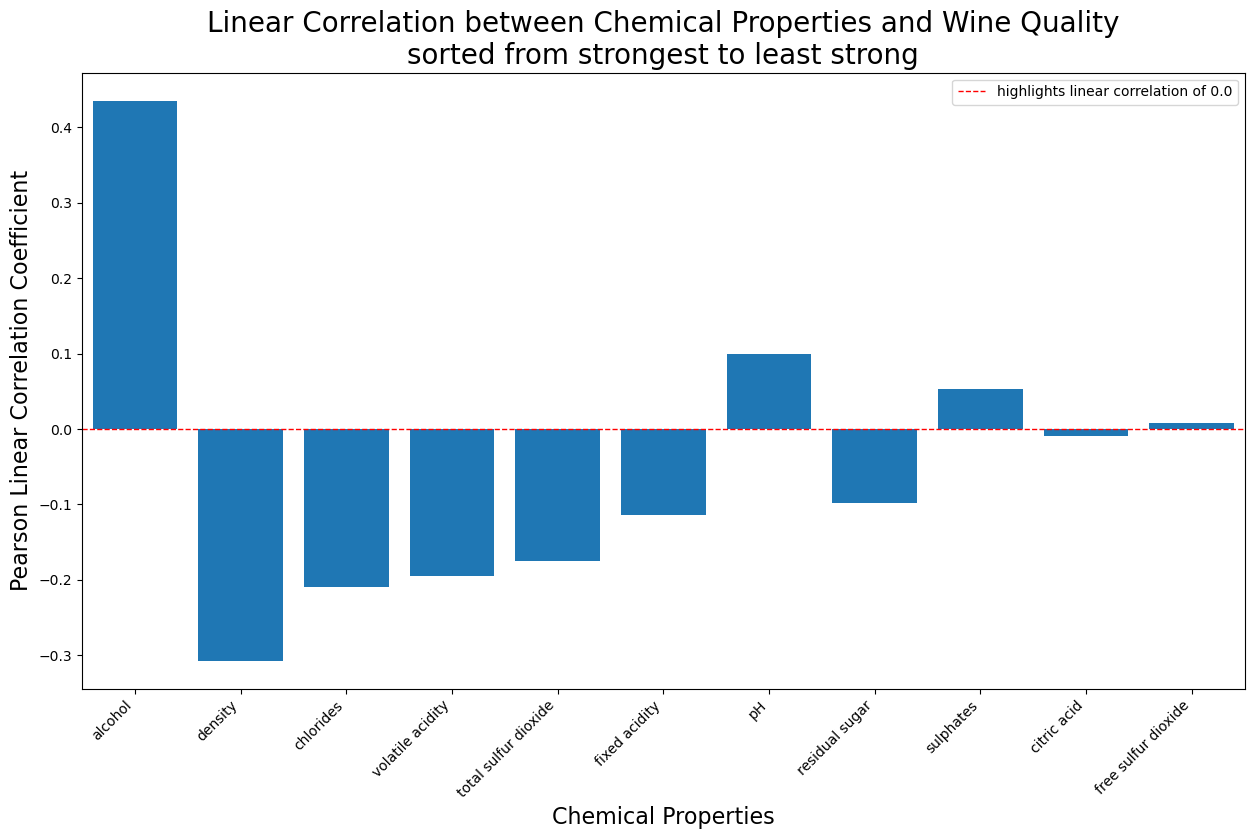

Assuming the chemical properties that have a correlation coefficient < 0.2 have very weak to negligible correlations,
the coefficients suggest that alcohol content, density, and chlorides  exhibit relatively moderate to weak linear associations with
wine quality, while other chemical properties such as volatile acidity, total sulfur dioxide, fixed acidity, pH, residual sugar, sulphates,
citric acid, and free sulfur dioxide demonstrate even weaker or negligible correlations.


In [5]:
# CELL4
wine = pd.read_excel('./Wine-Quality-Dataset.xlsx')

fa = wine['fixed acidity']
va = wine['volatile acidity']
ca = wine['citric acid']
rs = wine['residual sugar']
c = wine['chlorides']
fsd = wine['free sulfur dioxide']
tsd = wine['total sulfur dioxide']
d = wine['density']
p = wine['pH']
s = wine['sulphates']
a = wine['alcohol']
q = wine['quality']

correlations = wine.corr('pearson')['quality'].drop('quality')

sorted_correlations = correlations.iloc[correlations.abs().argsort()[::-1]]
#print(sorted_correlations)


# Visualize the correlation coefficients in a bar graph
plt.figure(figsize=(15, 8))
sorted_correlations.plot(kind='bar')
#N = 11
#ind = arange(N)  # the x locations for the data groups
#width = 0.8
#plt.bar(ind, correlations, width, color='r')
plt.bar(sorted_correlations.index, sorted_correlations)
plt.title('Linear Correlation between Chemical Properties and Wine Quality\nsorted from strongest to least strong', fontsize=20)
plt.xlabel('Chemical Properties', fontsize=16)
plt.ylabel('Pearson Linear Correlation Coefficient', fontsize=16)
plt.axhline(0, color='red', linestyle='--', linewidth=1) 
plt.legend(['highlights linear correlation of 0.0'])
plt.xticks(rotation=45, ha='right')
plt.savefig('Q1.Part2.4.png')
plt.show()

print('Assuming the chemical properties that have a correlation coefficient < 0.2 have very weak to negligible correlations,\n'
    'the coefficients suggest that alcohol content, density, and chlorides  exhibit relatively moderate to weak linear associations with\n'
    'wine quality, while other chemical properties such as volatile acidity, total sulfur dioxide, fixed acidity, pH, residual sugar, sulphates,\n'
      'citric acid, and free sulfur dioxide demonstrate even weaker or negligible correlations.')


MODEL: Quality = 0.39 * alcohol (A) + 38.22 * density (D) + -1.3 * chlorides (C) + -2.04 * volatile acidity (VA) + -35.57


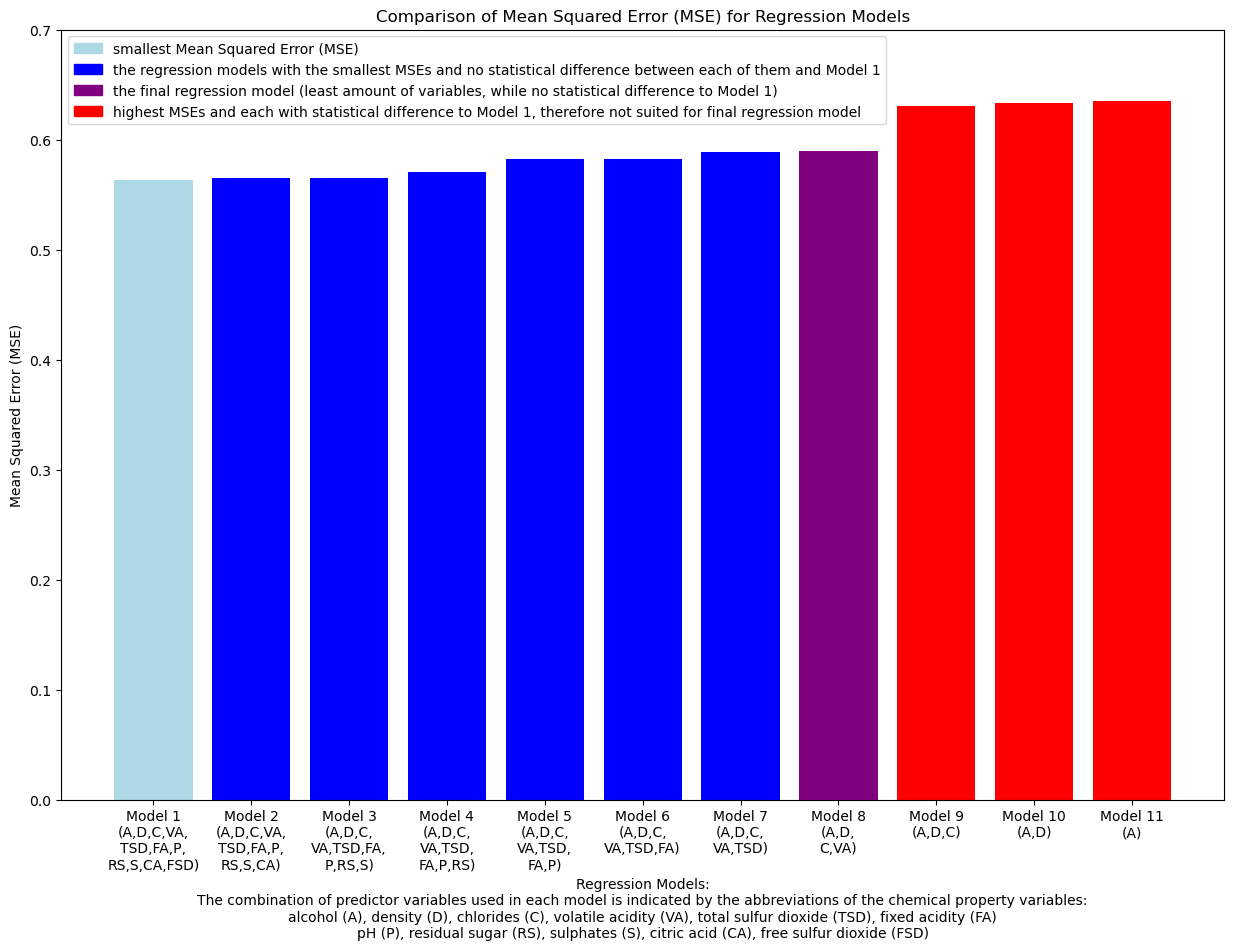

In [6]:
# CELL5
# Data Preprocessing
x1 = wine[['volatile acidity', 'chlorides', 'density', 'alcohol', 'fixed acidity', 'total sulfur dioxide', 'residual sugar', 'pH', 'sulphates', 'citric acid', 'free sulfur dioxide']]
x2 = wine[['alcohol', 'density', 'chlorides', 'volatile acidity']]
y = wine['quality']

#train_size = int(0.8 * len(wine))
#X1_train, X1_test = x1[:train_size], x1[train_size:]
#X2_train, X2_test = x2[:train_size], x2[train_size:]
#y1_train, y1_test = y[:train_size], y[train_size:]
#y2_train, y2_test = y[:train_size], y[train_size:]

# Train the linear regression model
#X1_train_with_intercept = sm.add_constant(X1_train)  # Add a constant term to the predictor variables
#model1 = sm.OLS(y1_train, X1_train_with_intercept).fit()

#X2_train_with_intercept = sm.add_constant(X2_train)  # Add a constant term to the predictor variables
#model2 = sm.OLS(y2_train, X2_train_with_intercept).fit()


# Make predictions on the test set
#X1_test_with_intercept = sm.add_constant(X1_test)
#y1_pred = model1.predict(X1_test_with_intercept)

#X2_test_with_intercept = sm.add_constant(X2_test)
#y2_pred = model2.predict(X2_test_with_intercept)

x1 = sm.add_constant(x1)
results1 = sm.OLS(y, x1).fit()
#print(results1.summary())

x2 = sm.add_constant(x2)
results2 = sm.OLS(y, x2).fit()
#print(results2.summary())

# Calculate MSE on the test set
#mse1 = mean_squared_error(y1_test, y1_pred)
#mse2 = mean_squared_error(y2_test, y2_pred)

mse1 = np.square(np.subtract(y,results1.predict())).mean()
mse2 = np.square(np.subtract(y,results2.predict())).mean()

#error1 = squared_error(y1_test, y1_pred)
#error2 = squared_error(y2_test, y2_pred)

error1 = np.square(np.subtract(y,results1.predict()))
error2 = np.square(np.subtract(y,results2.predict()))

#print ('error1 is normal?', stats.shapiro(error1)[1]>0.05)
#print ('error2 is normal?', stats.shapiro(error2)[1]>0.05)

#print('Is the observed difference significant? ',  stats.mannwhitneyu(error1, error2)[1]<0.05)

a=round(results2.params[0],2)

b1=round(results2.params[1],2)
b2=round(results2.params[2],2)
b3=round(results2.params[3],2)
b4=round(results2.params[4],2)
#b5=round(model.params[5],2)
#b6=round(model.params[6],2)
#b7=round(model.params[7],2)
#b8=round(model.params[8],2)
#b9=round(model.params[9],2)
#b10=round(model.params[10],2)
#b11=round(model.params[11],2)

#print('MODEL: Quality = ' + str(b1) + ' * fa + ' + str(b2) +' * va + ' + str(b3) + ' * ca + ' + str(b4)+' * rs + ' + str(b5) + ' * c + ' + str(b6) 
#      + ' * fsd + ' + str(b7) + ' * tsd + ' + str(b8) + ' * d + ' + str(b9) + ' * p + ' + str(b10) + ' * s + ' + str(b11) + ' * a + ' + str(a))

print('MODEL: Quality = ' + str(b1) + ' * alcohol (A) + ' + str(b2) +' * density (D) + ' + str(b3) + ' * chlorides (C) + ' + str(b4) + ' * volatile acidity (VA) + ' + str(a))

# Print MSE
#print(f"\nMean Squared Error 1 (MSE): {mse1}")
#print(f"\nMean Squared Error 2 (MSE): {mse2}")

mses = [0.5631540629878669, 0.5654077659385284, 0.5654255375058589, 0.5700856472488903, 0.5827057407007064, 0.582737042457642, 
        0.5890945613248282, 0.5898803749201863, 0.6309201954164392, 0.633273290174194, 0.6354137863258856]

# Model names or any labels for the x-axis
model_names = ['Model 1\n(A,D,C,VA,\nTSD,FA,P,\nRS,S,CA,FSD)', 'Model 2\n(A,D,C,VA,\nTSD,FA,P,\nRS,S,CA)', 'Model 3\n(A,D,C,\nVA,TSD,FA,\nP,RS,S)', 
               'Model 4\n(A,D,C,\nVA,TSD,\nFA,P,RS)', 'Model 5\n(A,D,C,\nVA,TSD,\nFA,P)', 'Model 6\n(A,D,C,\nVA,TSD,FA)', 'Model 7\n(A,D,C,\nVA,TSD)', 
               'Model 8\n(A,D,\nC,VA)', 'Model 9\n(A,D,C)', 'Model 10\n(A,D)', 'Model 11\n(A)']

#plt.figure(figsize=(20, 15))
# Plotting the bar graph
group_colors = ['lightblue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'red', 'red', 'red'] # Index of 'Model 8' in the model_names list

group_labels = ['Group 1 (Blue)', 'Group 2 (Light Blue)', 'Group 3 (Red)']

# Plotting the bar graph with grouping and legend
fig, ax = plt.subplots()
for i, model_name in enumerate(model_names):
    bar = ax.bar(model_name, mses[i], color=group_colors[i])

colors = {'smallest Mean Squared Error (MSE)':'lightblue', 
          'the regression models with the smallest MSEs and no statistical difference between each of them and Model 1':'blue', 
          'the final regression model (least amount of variables, while no statistical difference to Model 1)':'purple', 
          'highest MSEs and each with statistical difference to Model 1, therefore not suited for final regression model':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
# Plotting the bar graph
#bars = plt.bar(model_names, mses, color=colors)
#plt.yscale('log')
#legend_labels = ['Group 1 (Blue)', 'Group 2 (Light Blue)', 'Group 3 (Red)']
#plt.legend(legend_labels)

#bars[highlighted_model_index].set_color('blue')

# Adding labels and title
ylim([0, 0.7])
plt.xlabel('Regression Models:\n'
           'The combination of predictor variables used in each model is indicated by the abbreviations of the chemical property variables:\n'
           'alcohol (A), density (D), chlorides (C), volatile acidity (VA), total sulfur dioxide (TSD), fixed acidity (FA)\n'
           'pH (P), residual sugar (RS), sulphates (S), citric acid (CA), free sulfur dioxide (FSD)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Regression Models')
plt.savefig('Q1.Part2.5.png')
# Display the plot
plt.show()

# Visualize the results
#plt.figure(figsize=(20, 10))
#plt.plot(y_test, label='True values', marker='o')
#plt.plot(y_pred, label='Predicted values', marker='o')
#plt.title('Linear Regression Model Performance')
#plt.xlabel('Observation')
#plt.ylabel('Quality')
#plt.legend()
#plt.show()
# Manually define the Mean Squared Error (MSE) function
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2)




In [7]:
# CELL6
print('In the process of developing the most suitable regression model, I initiated testing with all 11 chemical properties as predictor variables and successively removed\n'
'the variable with the smallest Pearson linear correlation coefficient in each iteration. Surprisingly, the model incorporating all 11 variables yielded the smallest\n'
'Mean Squared Error (MSE), while each subsequent model, with fewer variables, exhibited higher Mean Squared Error (MSE). Subsequently, I calculated the Squared Error for each of the 11 models\n'
'and subjected them to a normality test using the Shapiro-Wilk test (stats.shapiro()), revealing that none of the models displayed a normal distribution.\n'
'Employing the Mann–Whitney U test (stats.mannwhitneyu()), I assessed the statistical difference for each model`s Mean Squared Error (MSE) in comparison to Model 1 (with the smallest Mean Squared Error (MSE))\n'
'and concluded that Models 2-8 exhibited no statistical difference from Model 1, as the p-value was >= 0.05. Consequently, I selected Model 8 as the final model,\n'
'as it is not statistically different in its performance to Model 1, but is significantly less complex with only 4 variables.'
)



In the process of developing the most suitable regression model, I initiated testing with all 11 chemical properties as predictor variables and successively removed
the variable with the smallest Pearson linear correlation coefficient in each iteration. Surprisingly, the model incorporating all 11 variables yielded the smallest
Mean Squared Error (MSE), while each subsequent model, with fewer variables, exhibited higher Mean Squared Error (MSE). Subsequently, I calculated the Squared Error for each of the 11 models
and subjected them to a normality test using the Shapiro-Wilk test (stats.shapiro()), revealing that none of the models displayed a normal distribution.
Employing the Mann–Whitney U test (stats.mannwhitneyu()), I assessed the statistical difference for each model`s Mean Squared Error (MSE) in comparison to Model 1 (with the smallest Mean Squared Error (MSE))
and concluded that Models 2-8 exhibited no statistical difference from Model 1, as the p-value was >= 0.05. Consequent

In [8]:
import scipy
print(scipy.__version__)

1.11.1
